In [92]:
from sklearn.datasets import make_classification, load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df = pd.DataFrame(load_iris().data)
df['class'] = load_iris().target
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'species']
df.dropna(how="all", inplace=True)

In [93]:
df = df.iloc[:,[0,2,-1]]

In [94]:
X, y = df.drop("species", axis=1), df.species
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier().fit(X_train,y_train)

In [95]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
train_size_abs, train_scores, test_scores = learning_curve(
    tree, X, y, train_sizes=[0.3, 0.6, 0.9]
)
for train_size, cv_train_scores, cv_test_scores in zip(
    train_size_abs, train_scores, test_scores):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

36 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.33
72 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.67
108 samples were used to train the model
The average train accuracy is 0.98
The average test accuracy is 0.93


In [96]:
clf.score(X_test, y_test)

0.9111111111111111

In [97]:
X_train

,sepal_len,petal_len
4,5.0,1.4
136,6.3,5.6
12,4.8,1.4
15,5.7,1.5
108,6.7,5.8
...,...,...
24,4.8,1.9
81,5.5,3.7
29,4.7,1.6
122,7.7,6.7


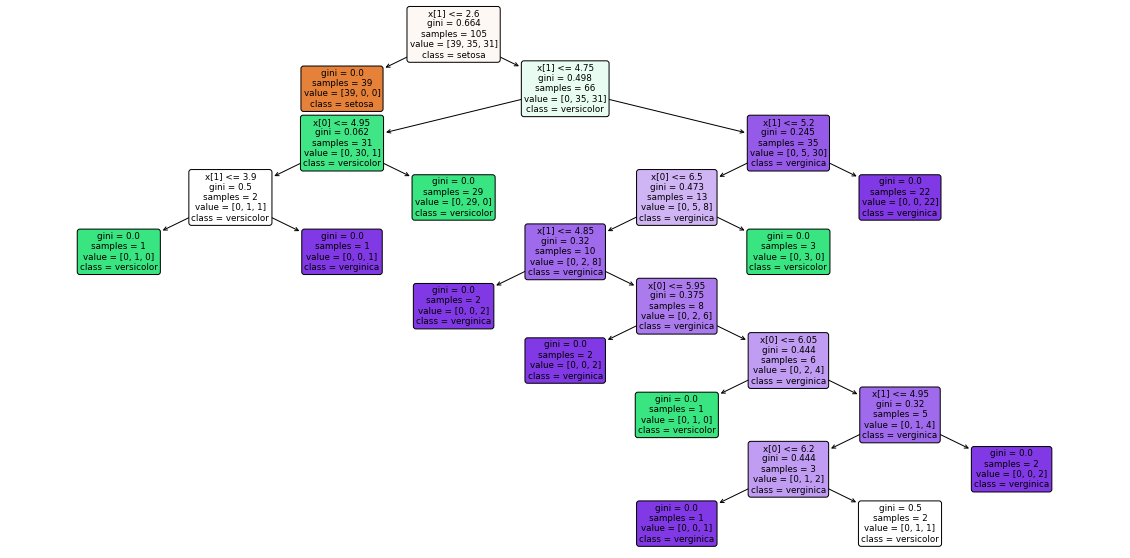

In [98]:
plt.figure(figsize=(20,10))
plot_tree(clf, class_names=['setosa','versicolor','verginica'], rounded=True, filled=True);
plt.show()

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


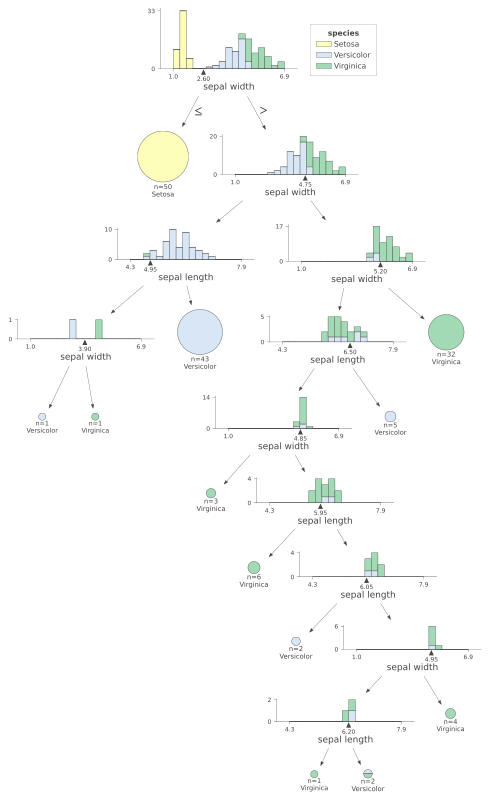

In [99]:
import dtreeviz

viz = dtreeviz.model(clf, X, y,
               target_name='species',
               feature_names=["sepal length", "sepal width", "petal length", "petal width"],
               class_names=['Setosa', 'Versicolor', 'Virginica'])
viz.view()

In [105]:
X[['sepal_len', 'petal_len']].head(5)

,sepal_len,petal_len
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


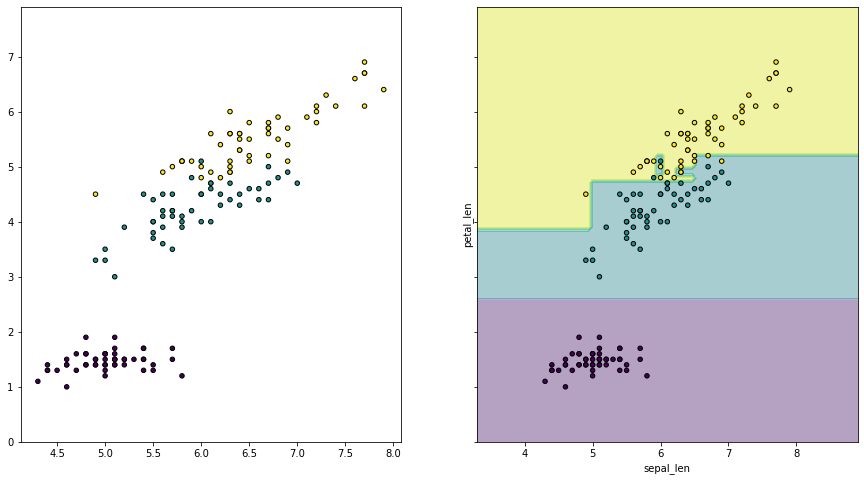

In [103]:
from sklearn.inspection import DecisionBoundaryDisplay
# Plotting decision regions
f, ((ax1,ax2)) = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(15, 8))

DecisionBoundaryDisplay.from_estimator(
        clf, X[['sepal_len', 'petal_len']], alpha=0.4, ax=ax2, response_method="predict"
    )

ax1.scatter(X["sepal_len"], X["petal_len"], c=y, s=20, edgecolor="k")


ax2.scatter(X["sepal_len"], X["petal_len"], c=y, s=20, edgecolor="k")

plt.show()